In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:

cnn.add(tf.keras.layers.SeparableConv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [7]:
cnn.add(tf.keras.layers.SeparableConv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 360s 1s/step - loss: 0.6916 - accuracy: 0.5457 - val_loss: 0.6282 - val_accuracy: 0.6555
Epoch 2/25
250/250 [==============================] - 237s 950ms/step - loss: 0.6242 - accuracy: 0.6517 - val_loss: 0.6247 - val_accuracy: 0.6560
Epoch 3/25
250/250 [==============================] - 439s 2s/step - loss: 0.6003 - accuracy: 0.6844 - val_loss: 0.5850 - val_accuracy: 0.6985
Epoch 4/25
250/250 [==============================] - 418s 2s/step - loss: 0.5846 - accuracy: 0.6953 - val_loss: 0.6213 - val_accuracy: 0.6570
Epoch 5/25
250/250 [==============================] - 442s 2s/step - loss: 0.5666 - accuracy: 0.7022 - val_loss: 0.5679 - val_accuracy: 0.7170
Epoch 6/25
250/250 [==============================] - 307s 1s/step - loss: 0.5411 - accuracy: 0.7264 - val_loss: 0.5567 - val_accuracy: 0.7300
Epoch 7/25
250/250 [==============================] - 252s 1s/step - loss: 0.5198 - accuracy: 0.7413 - val_loss: 0.5334 - val_accuracy: 0.7

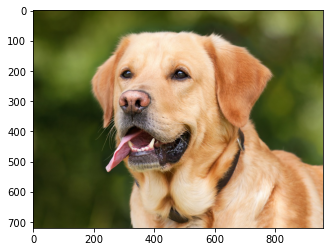

In [34]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
from skimage import io
from matplotlib import pyplot as plt
# io.imshow(test_image)
# plt.show()
# test_image.show()

img = io.imread('dataset/single_prediction/cat_or_dog_1.jpg')
plt.imshow(img)
plt.show()

# test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [35]:
prediction

'dog'